
# Pandas: reshape
---

**What we are after...**

- Understand and be able to apply the `melt`/`stack`/`unstack`/`pivot` methods

---

In [ ]:
import numpy as np
import pandas as pd

## Reshaping your data

The data you receive is not always in a "shape" makes it easy to analyze

What do we mean by shape? We mean the number of rows and columns in a DataFrame and how information is stored in the index and column names

This lecture will teach you the basic concepts of reshaping data

As with other topics, we recommend reviewing the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reshaping.html) on this subject for additional information

We will keep our discussion here as brief and simple as possible because these tools will appear repeatedly in subsequent notebooks

In [ ]:
# made up
# columns A and B are "identifiers" and C, D, and E are variables
df = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": "x y x z".split(),
    "C": [1, 2, 1, 4],
    "D": [10, 20, 30, 20,],
    "E": [2, 1, 5, 4,]
})

df.info()
df

In [ ]:
bball = pd.DataFrame({
    "Year": [2015, 2016, 2017]*2,
    "Player": ["Curry"]*3 + ["Durant"]*3,
    "Team": ["GSW"]*3 + ["OKC"] + ["GSW"]*2,
    "Pts": [30.1, 25.3, 27.1, 28.2, 25.1, 25.9],
    "Assist": [6.7, 6.6, 6.4, 5.0, 4.8, 5.3],
    "Rebound": [4.5, 3.9, 3.4, 4.4, 6.5, 7.6]
})

bball.info()
bball

### Long vs wide

Many of these operations change between long and wide DataFrames

What does it mean for a DataFrame to be long or wide?

Here is long possible long form representation of our basketball data

In [ ]:
# Don't worry about what this command does -- We'll see it soon
long = bball.melt(id_vars=["Year", "Player", "Team"])

long

And here is a wide form version

In [ ]:
# Again, don't worry about this command... We'll see it soon too
bball_wide = long.pivot_table(index="Year", columns=["Player", "Team", "variable"], values="value")
bball_wide

## `set_index`, `reset_index`, and transpose

We have already seen a few of the most basic methods for reshaping a DataFrame 

* `set_index`
* `reset_index`
* `T`

Sometimes the simplest approach is the right approach

Let's review them briefly

In [ ]:
df2 = df.set_index(["A", "B"])
df2.head()

In [ ]:
df3 = df2.T
df3.head()

## `stack` and `unstack`

The `stack` and `unstack` methods operate directly on the index and/or column labels

`stack` is used to move certain levels of the column labels into the index (i.e. moving from wide to long)

`unstack` moves levels of the index into the columns (i.e. moving from long to wide)

Below is an animation that shows how stacking works

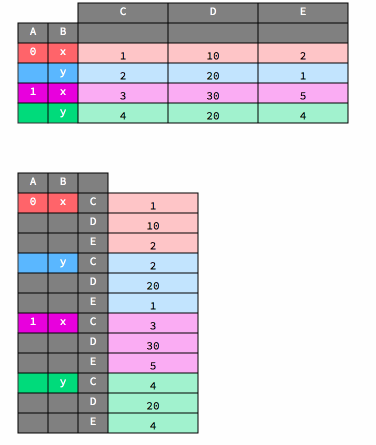

In [ ]:
df2

In [ ]:
df2_stack = df2.stack()
df2_stack

And here is an animation that shows how unstacking works


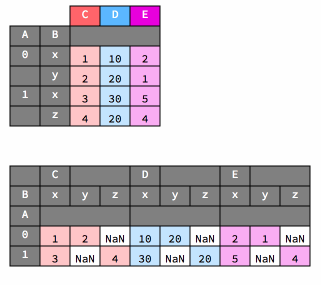

In [ ]:
df2

In [ ]:
df2.unstack()

In this example, we have multiple levels in the index to start with

When we use `unstack` without any options it only moves the innermost index (the one closest to the data)

Pandas let's us choose which level(s) to move when we `unstack` through the `level` argument

In [ ]:
df2.unstack(level=0)

In [ ]:
# can also specify by name, if our index levels have names
df3 = df2.unstack(level="B")
df3

**Exercise**:

- What happens when you run the code `df2.unstack(level=[0, 1])`? What could you use instead of `[0, 1]` to produce the same output?
- Read the `unstack` documentation about the argument `fill_value`. What do you think will happen with `df2.unstack(level="A", fill_value=0.0)`?

**Exercise** (_warning_: this one is challenging):

Recall the `bball_wide` DataFrame from above (repeated below to jog your memory)?

Your task here Let's re-create it from `bball` by combining the operations we just learned about

There are many ways to do this, so be creative

Our solution used `set_index`, `T`, `stack`, and `unstack` in that order

Here are a few hints:

-  Think about what columns you will need to call `set_index` on so that their data ends up as labels (either in index or columns)
- Leave other columns (e.g. the actual game stats) as actual columns so their data can stay data during your reshaping

--- 

Don't spend too much time on this... if you get stuck, open up **this** markdown cell and you will see our answer hidden

<div style="display: none;">`bball.set_index(["Year", "Player", "Team"]).T.stack("Year").unstack(level=0)`</div>

In [ ]:
bball_wide

### Summary 

In some ways  `set_index`, `reset_index`, `stack`, and `unstack` are the "most fundamental" reshaping operations... 

The other operations we talk about can be formulated in terms of these four operations (and, in fact, some of them are exactly written as these operations in `pandas`'s code base)

_Pro tip_: 

We remember stack vs unstack with a mnemonic: **U**nstack moves index levels **U**p 

## `melt`

The `melt` method is used to move from wide to long form

It can be used to move all of the "values" stored in your DataFrame to a single column with all other columns being used to contain identifying information

**Warning**: when you use `melt` any index that you currently have will be deleted

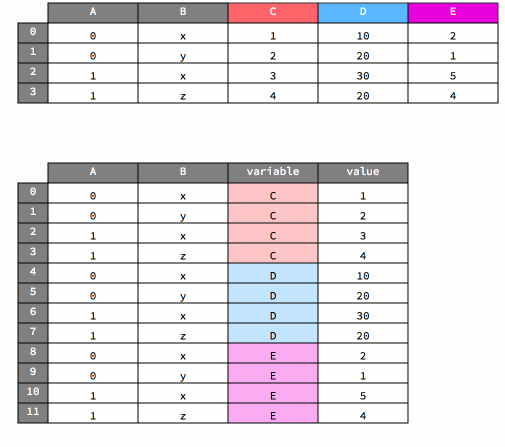

In [ ]:
df

In [ ]:
df_melted = df.melt(id_vars=["A", "B"])
df_melted

**Exercise**:

- What do you think would happen if we wrote `df.melt(id_vars=["A"])` rather than `df.melt(id_vars=["A", "B"])`? Were you right? Talk about why or why not with your neighbor
- Read the documentation and focus on the argument `value_vars`. How does `df.melt(id_vars=["A", "B"], value_vars=["C", "D"])` differ from `df.melt(id_vars=["A", "B"])`?
- Explain the differences between `df2.stack()` and `df2.melt()` to your neighbor. Is there a way to make them generate the same output (Hint: you might need to use both `stack` and another method from above)?


## `pivot` and `pivot_table`

The next two methods that we will use for reshaping are closely related

Some of you might even already be familiar with these ideas because you have previously used _pivot tables_ in Excel

* If so, good news. We think this is even more powerful than in Excel and easier to use!
* If not, good news. We are about to teach you a very powerful and easy to use tool

We will begin with `pivot`

The `pivot` method

* Takes the unique values of one column and places them along the index
* Takes the unique values of another column and places them along the columns
* Takes the values that correspond to a third column and fills in the DataFrame values that correspond to that index/column pair

It is best to learn by example (and excruciating amounts of practice)

In [ ]:
df

In [ ]:
df.pivot(index="A", columns="B", values="E")

We can replicate `pivot` using three of the fundamental operations from above:

1. Call `set_index` with the `index` and `columns` arguments
2. Extract the `values` column
3. `unstack` the columns level of the new index

In [ ]:
#  1------------------  2---  3----------------
df.set_index(["A", "B"])["E"].unstack(level="B")

One important thing to be aware of is that in order for `pivot` to work, the index/column pairs must be _unique_!

Below we demonstrate the error that comes up when they are not unique

In [ ]:
# (x, 1) in columns (B, C) appears in both row 0 and row 2
df.pivot(index="B", columns="C", values="E")

**Exercise**:


- Draw what you think the output of `df.pivot(index="D", columns="A", values="C")` will look like
- What happens if we exclude `value="C"` from the command above?
- What happens when you run `df.set_index(["B", "C"]).unstack(level="C")`? Explain to your neighbor why this happened

### `pivot_table`

The `pivot_table` method is simply a generalization of `pivot`

It overcomes two limitations of `pivot`:

1. It allows you to choose multiple columns for the index/columns/values arguments
2. It allows you to deal with the problem of having duplicate entries by having you choose how to combine them

In [ ]:
df

Notice that we can replicate the functionality of `pivot` if we pass the same arguments

In [ ]:
df.pivot(index="A", columns="B", values="E")

In [ ]:
df.pivot_table(index="A", columns="B", values="E")

But we can also choose multiple columns to be used in index/columns/values

In [ ]:
df.pivot_table(index=["A", "B"], columns="C", values="D")

In [ ]:
df.pivot_table(index="A", columns=["B", "C"], values="D")

AND we can deal with duplicated index/column pairs

In [ ]:
# This produced an error
# df.pivot(index="B", columns="C", values="E")

# This doesn't!
df_pt = df.pivot_table(index="B", columns="C", values="E")
df_pt

`pivot_table` handles duplicate index/column pairs using a reduction

By default, the reduction is the mean

For example, our duplicated index/column pair is `("x", 1)` and had associated values of 2 and 5

Notice that `df_pt.loc["x", 1]` is $\frac{2 + 5}{2} = 3.5$

But wait, there's more

We can actually choose how `pandas` aggregates all of the values

For example, maybe we wanted to keep the maximum value

In [ ]:
df.pivot_table(index="B", columns="C", values="E", aggfunc=np.max)

Maybe we wanted to count how many values there were

In [ ]:
df.pivot_table(index="B", columns="C", values="E", aggfunc=len)

We can even pass multiple reduction functions!

In [ ]:
df.pivot_table(index="B", columns="C", values="E", aggfunc=[np.max, len])

**Exercise**:


- First, take a breath... That was a lot to take in
- Can you think of a reason to ever use `pivot` rather than `pivot_table`? Discuss with your neighbors
- Create a pivot table with column `A` as the index, `B` as the columns, and `C` as the values. What happens when you use `aggfunc=[np.max, np.min, len]`. Discuss how Python produced each of the values in the pivot table you see with your neighbors